In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('telecomX')
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [4]:
df = df.drop(columns = ['customerID'])
df.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_diarias'],
      dtype='object')

In [5]:
df_encoded = df.copy()

binary_cols = ['customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling']


for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

multi_class_cols = [
          'customer_gender',
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod']

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)


df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

print(df_encoded.head())
print(df_encoded.info())

   Churn  customer_SeniorCitizen  customer_Partner  customer_Dependents  \
0    0.0                       0                 1                    1   
1    0.0                       0                 0                    0   
2    1.0                       0                 0                    0   
3    1.0                       1                 1                    0   
4    1.0                       1                 1                    0   

   customer_tenure  phone_PhoneService  phone_MultipleLines  \
0                9                   1                  0.0   
1                9                   1                  1.0   
2                4                   1                  0.0   
3               13                   1                  0.0   
4                3                   1                  0.0   

   internet_OnlineSecurity  internet_OnlineBackup  internet_DeviceProtection  \
0                      0.0                    1.0                        0.0   
1         

In [6]:
df_encoded['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


In [7]:
df_encoded['Churn'].value_counts(normalize=True)

,proportion
Churn,
0.0,0.73463
1.0,0.26537


Churn                                            1.000000
internet_InternetService_Fiber optic             0.308020
account_PaymentMethod_Electronic check           0.301919
account_Charges_Monthly                          0.193356
Cuentas_diarias                                  0.193356
account_PaperlessBilling                         0.191825
customer_SeniorCitizen                           0.150889
phone_MultipleLines                              0.040207
phone_PhoneService                               0.011942
customer_gender_Male                            -0.008612
internet_StreamingTV                            -0.037057
internet_StreamingMovies                        -0.040132
account_PaymentMethod_Mailed check              -0.091683
account_PaymentMethod_Credit card (automatic)   -0.134302
customer_Partner                                -0.150448
customer_Dependents                             -0.164221
internet_DeviceProtection                       -0.177125
account_Contra

/tmp/ipython-input-1931493887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="viridis")


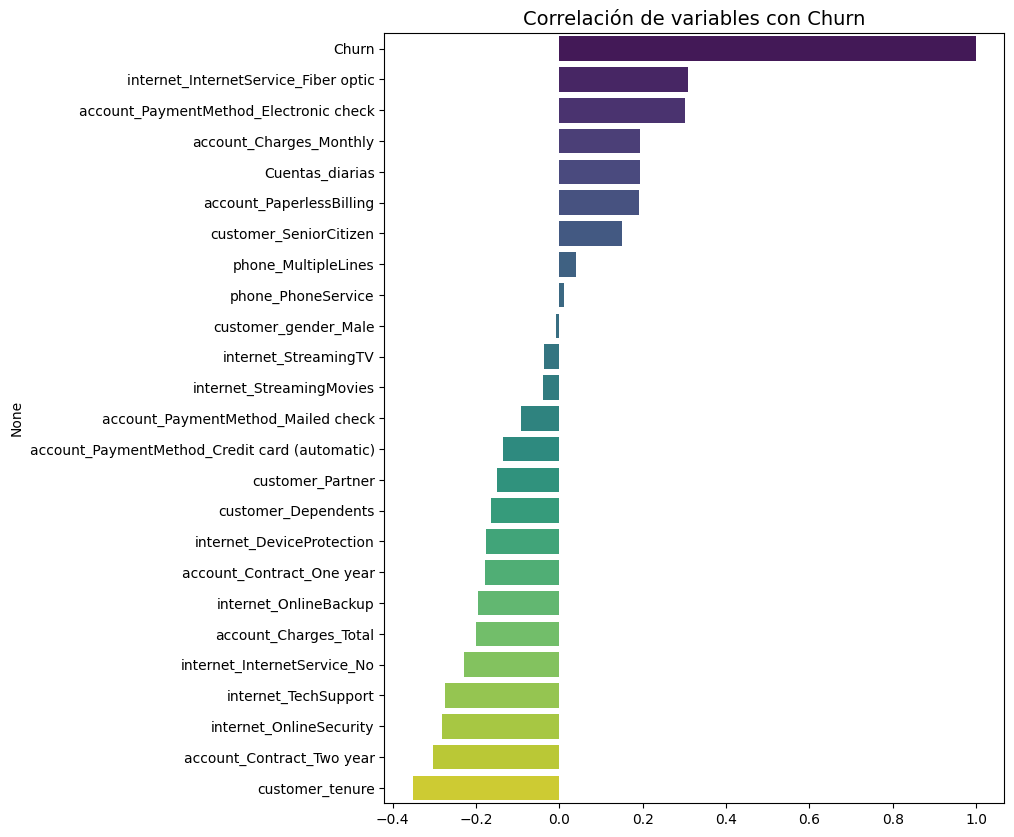

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_encoded.corr()
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

print(churn_corr)



plt.figure(figsize=(8,10))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="viridis")
plt.title("Correlación de variables con Churn", fontsize=14)
plt.show()

In [9]:
df_encoded.drop(columns = ['phone_PhoneService','customer_gender_Male','phone_MultipleLines'], axis=1,inplace=True)

In [10]:
df_encoded = df_encoded.dropna(subset=['Churn'])

In [11]:
df_encoded['Churn'].value_counts(normalize=True)


,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [13]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

📊 Regresión Logística
Accuracy: 0.7434926644581165
              precision    recall  f1-score   support

         0.0       0.91      0.72      0.81      1552
         1.0       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113



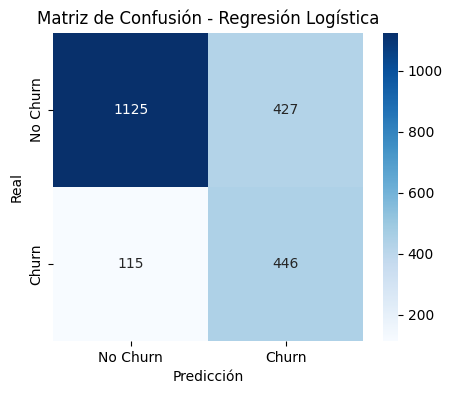

📊 Random Forest
Accuracy: 0.780407004259347
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1552
         1.0       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



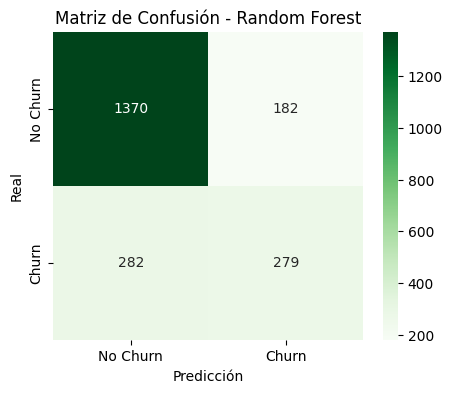

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_reg.predict(X_test_scaled)

print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_imputed, y_train)

y_pred_rf = rf_clf.predict(X_test_imputed)

print("📊 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Comparación de modelos

 Random Forest

Accuracy: 0.78 (ligeramente mejor que la regresión logística en general).

Muy bueno detectando clientes que NO cancelan (Clase 0 → recall 0.88).

Más débil para detectar clientes que SÍ cancelan (Clase 1 → recall 0.50).

Tiende a equilibrar, pero favorece a la clase mayoritaria (No Churn).

 Regresión Logística

Accuracy: 0.74 (un poco menor que Random Forest).

Excelente en predecir cancelaciones reales (Clase 1 → recall 0.80, mucho mejor que RF).

Sin embargo, baja un poco en precisión para cancelados (0.51, es decir, a veces “se confunde”).

Tiende a ser más sensible a detectar churn, aunque se equivoque más veces.

Si la empresa quiere detectar con más seguridad a los clientes que cancelarán (Churn) → Regresión Logística es mejor, porque alcanza un recall mucho más alto en la clase 1 (80%).

Si se busca un modelo más equilibrado en general y con más exactitud total → Random Forest es la mejor opción, aunque se le escapan más clientes que cancelan.

# **Informe de Predicción de Cancelación (Churn)**

Construimos dos modelos: Regresión Logística  y Random Forest

En test:

Random Forest: Accuracy 0.78; para Churn=1: Precision 0.61, Recall 0.50, F1 0.55.

Regresión Logística: Accuracy 0.74; para Churn=1: Precision 0.51, Recall 0.80, F1 0.62.

Conclusión práctica: si el objetivo es detectar al máximo a los que se van (recuperaciones), la Regresión Logística es preferible (Recall=0.80). Si se busca desempeño global, Random Forest ofrece mayor accuracy, pero deja escapar más churn reales.

2) Variables que más influyen en la cancelación

Basado en las correlaciones con Churn y la codificación (mes de referencia: Month-to-month al usar drop_first):

Factores que aumentan el churn (correlación positiva)

Internet: Fiber optic (+0.31)
Posible mayor sensibilidad a incidencias técnicas/competencia.

Pago con Electronic check (+0.30)
Segmento propenso a cancelar; su contraparte “automático” reduce churn.

Cargos mensuales altos (+0.19)
Precio percibido alto impulsa cancelación. (Cuentas_diarias parece derivada de este costo → redundancia probable).

Paperless Billing (+0.19)
Señal de cliente “digital” que podría ser más sensible a precio/experiencia online.

SeniorCitizen (+0.15)
Mayor propensión a cancelar (posibles fricciones de servicio/soporte).

Nota: El hecho de que account_Contract_Two year y One year correlacionen negativamente implica que el Month-to-month (categoría base) se asocia a más churn.

Factores que reducen el churn (correlación negativa)

Mayor Tenure (–0.35)
Clientes antiguos son más leales.

Contrato de 2 años (–0.30) y 1 año (–0.18)
Compromiso contractual reduce bajas.

Online Security (–0.28) y Tech Support (–0.27)
Paquetes/soporte técnico reducen cancelación.

Sin Internet (–0.23)
(Segmento de solo telefonía; menos fricción).

Total Charges alto (–0.20)
Señal indirecta de antigüedad/engagement.

Device Protection / Online Backup (≈ –0.18/–0.20)
Add-ons de valor retienen.

Posible redundancia: Cuentas_diarias ≈ función lineal de Charges_Monthly. Útil depurar una de las dos (para estabilidad de la Regresión Logística).

3) Desempeño de Modelos (test)

Random Forest

Accuracy 0.78

Churn=1: Precision 0.61 / Recall 0.50 / F1 0.55

Interpretable vía importancias; robusto a no normalización. Tiende a favorecer la clase mayoritaria.

Regresión Logística

Accuracy 0.74

Churn=1: Precision 0.51 / Recall 0.80 / F1 0.62

Excelente para detectar churn (alto recall) a costa de más falsos positivos.

Riesgos de over/underfitting

Sin métricas de entrenamiento no podemos confirmarlo, pero:

RF con recall bajo en Churn podría estar infraajustando a la clase minoritaria (no se usó SMOTE/class_weight).

Logística con alto recall puede estar beneficiándose del SMOTE (bien para recall).
Mejora sugerida para comparabilidad: aplicar class_weight='balanced' o SMOTE también al RF (o usar BalancedRandomForest), y ajustar umbrales de probabilidad en ambos.

4) Recomendaciones de Retención (accionables)
A. Precio y Plan

Reoptimización de plan para clientes con cargos mensuales altos: ofertas de downgrade inteligente, bundles con descuento, o beneficios por fidelidad.

Migración de Month-to-month → 1-2 años:
Bonos de bienvenida (mes gratis/instalación/upgrade de velocidad) a cambio de contrato anual/bianual.

B. Pagos

Migrar de Electronic check → pagos automáticos (tarjeta/transferencia):
Incentivo puntual (descuento único o puntos) y flujo simple de activación en app.
Comunicación dirigida a clientes con historial de Electronic check + alto riesgo (según score del modelo).

C. Experiencia técnica (especialmente en Fiber optic)

Programa “Fiber First Fix”:

Monitoreo proactivo de fallas/latencia.

Citas de soporte priorizadas para fibra.

“Garantía de servicio” (crédito en factura si SLA no se cumple).

Upsell de Tech Support / Online Security con prueba gratuita 1–3 meses para segmentos de mayor riesgo.

D. Onboarding y segmento senior

Onboarding 0–90 días: llamadas/WhatsApp proactivo + tutoriales simples → reduce churn temprano (bajo tenure).

Segmento Senior: línea de atención dedicada, facturas simplificadas, guía para pagos automáticos y asistencia presencial si aplica.

E. Comunicación / Paperless

Paperless Billing mostró relación positiva con churn:

Revisar usabilidad de la app/portal, claridad de factura digital y frecuencia de notificaciones.

Experimentos A/B: tono/momento del recordatorio de pago, mensajes personalizados de valor del servicio.

5) Uso del Modelo en Operación

Estrategia por umbral (Regresión Logística): calibrar el corte para alcanzar Recall objetivo (ej. ≥0.80) con un nivel de precision aceptable para el equipo de retención.

Lista diaria de alto riesgo: priorizar clientes con: Month-to-month + Fiber + Electronic check + cargos altos + bajo tenure.

Medir impacto: tasa de contacto efectiva, % de retenciones, costo por cliente salvado, uplift vs. control.


## Resultado esperado: mayor detección temprana de churn y mejoras medibles en retención con enfoque ROI.